# Edge Detection

---
## 1. What is an Edge?

We define an edge as **rapid changes in image intensity**. And such changes are caused by various physical phenomena as following

- Surface Normal Discontinuity
- Depth Discontinuity
- Surface Reflectance Discontinuity
- Illumination Discontinuity

Our goal for the edge detector to produce:
- Edge Position
- Edge Magnitude (strength)
- Edge Orientation (direction)

---
## 2. Edge Detection Using Gradients

Now, because we defined edges as rapid changes in image intensity, we have a perfect tool to find these changes -- derivative. 

Below is an example in 1D space where we graph out the intensity of a gray scale image as a function. Taking the derivative will then provide us the rate of change at each pixel. The higher the absolute value of the rate of change, the higher the chance that pixel is an edge.

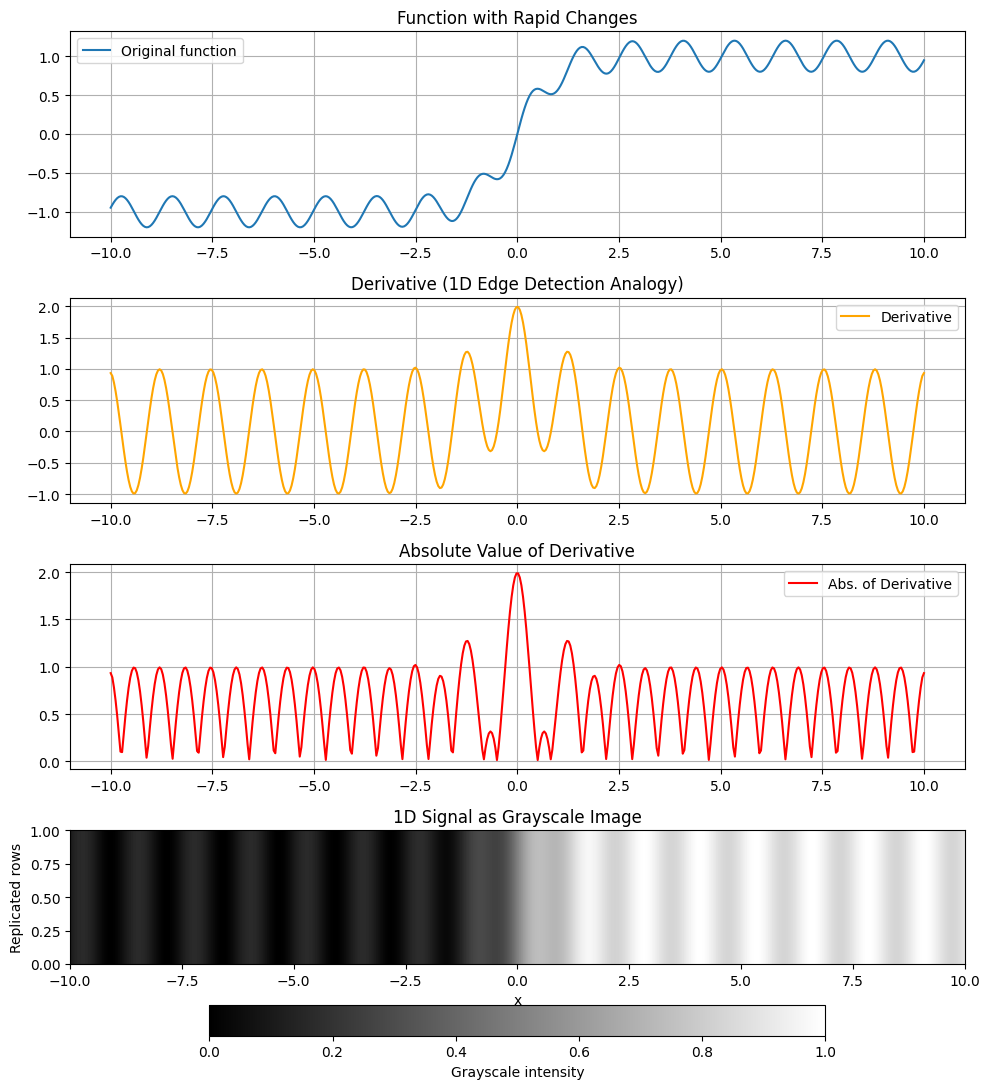

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create x values
x = np.linspace(-10, 10, 500)

# Define the function
y = np.tanh(x) + 0.2 * np.sin(5 * x)

# Compute derivative numerically
dy_dx = np.gradient(y, x)
abs_dy_dx = np.abs(dy_dx)

# Normalize y to [0, 1] for grayscale
y_normalized = (y - np.min(y)) / (np.max(y) - np.min(y))

# Make a 1D grayscale "image" by repeating y across rows
image_1d = np.tile(y_normalized, (50, 1))

# Create figure with 4 subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 11))

# 1. Original function
axes[0].plot(x, y, label="Original function")
axes[0].set_title("Function with Rapid Changes")
axes[0].legend()
axes[0].grid(True)

# 2. Derivative
axes[1].plot(x, dy_dx, label="Derivative", color="orange")
axes[1].set_title("Derivative (1D Edge Detection Analogy)")
axes[1].legend()
axes[1].grid(True)

# 3. Abs of the derivative
axes[2].plot(x, abs_dy_dx, label="Abs. of Derivative", color="red")
axes[2].set_title("Absolute Value of Derivative")
axes[2].legend()
axes[2].grid(True)

# 4. Grayscale image representation
im = axes[3].imshow(image_1d, cmap="gray", aspect="auto", extent=[x.min(), x.max(), 0, 1])
axes[3].set_title("1D Signal as Grayscale Image")
axes[3].set_xlabel("x")
axes[3].set_ylabel("Replicated rows")

# Add horizontal colorbar below the grayscale image
cbar = fig.colorbar(im, ax=axes[3], orientation="horizontal", pad=0.2)
cbar.set_label("Grayscale intensity")

plt.tight_layout()
plt.show()


For a 2D image, we want to take the partial derivatives along both direction in terms of the intensity of the image.
Let's define the intensity of the image as $I$, and the intensity at $(x, y)$ would be $I(x, y)$. The gradient (partial derivatives) of the image function $I$ would be:

$$
\nabla I = [\frac{dI}{dx}, \frac{dI}{dy}]
$$

Gradient Magnitude:
$$
S = ||\nabla I|| = \sqrt{(\frac{dI}{dx})^2 + (\frac{dI}{dy})^2}
$$

Gradient Orientation:
$$
\theta = tan^{-1} (\frac{dI}{dy} / \frac{dI}{dx})
$$

And if we want to approximate the derivatives, we need at least a $2 x 2$ matrix where $\epsilon$ is the distance between two pixels:

\[
\begin{bmatrix}
I_{i,j+1} & I_{i+1,j+1} \\
I_{i,j} & I_{i+1,j}
\end{bmatrix}
\]

Therefore 
$$
\frac{dI}{dx} \approx \frac{1}{2\epsilon} ((I_{i+1,j+1}-I_{i,j+1}) + (I_{i+1,j}-I_{i,j}))
$$
$$
\frac{dI}{dy} \approx \frac{1}{2\epsilon} ((I_{i+1,j+1}-I_{i+1,j}) + (I_{i,j+1}-I_{i,j}))
$$

It turns out we can actually use convolution to implement this:

$$
\frac{dI}{dx} \approx \frac{1}{2\epsilon} 
\begin{bmatrix}
-1 & 1 \\
-1 & 1
\end{bmatrix}
$$

$$
\frac{dI}{dy} \approx \frac{1}{2\epsilon} 
\begin{bmatrix}
1 & 1 \\
-1 & -1
\end{bmatrix}
$$


There are a few commonly used Gradient Operators:

1. Roberts Cross Operator (2×2)

$$
G_x =
\begin{bmatrix}
+1 & 0 \\
0 & -1
\end{bmatrix}, \quad
G_y =
\begin{bmatrix}
0 & +1 \\
-1 & 0
\end{bmatrix}
$$


2. Prewitt Operator (3×3)

$$
G_x =
\begin{bmatrix}
-1 & 0 & +1 \\
-1 & 0 & +1 \\
-1 & 0 & +1
\end{bmatrix}, \quad
G_y =
\begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
+1 & +1 & +1
\end{bmatrix}
$$


3. Sobel Operator (3×3)

$$
G_x =
\begin{bmatrix}
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1
\end{bmatrix}, \quad
G_y =
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1
\end{bmatrix}
$$


4. Sobel Operator (5×5)

$$
G_x =
\begin{bmatrix}
-2 & -1 & 0 & 1 & 2 \\
-2 & -1 & 0 & 1 & 2 \\
-4 & -2 & 0 & 2 & 4 \\
-2 & -1 & 0 & 1 & 2 \\
-2 & -1 & 0 & 1 & 2
\end{bmatrix}, \quad
G_y =
\begin{bmatrix}
-2 & -2 & -4 & -2 & -2 \\
-1 & -1 & -2 & -1 & -1 \\
0 & 0 & 0 & 0 & 0 \\
1 & 1 & 2 & 1 & 1 \\
2 & 2 & 4 & 2 & 2
\end{bmatrix}
$$


In general, smaller operators are good at localization but are sensitive to noise, where bigger operators are bad at localization but are less sensitive to noise.

Here is an example showing the edge detection result using the Sobel(3x3) Gradient Operator:

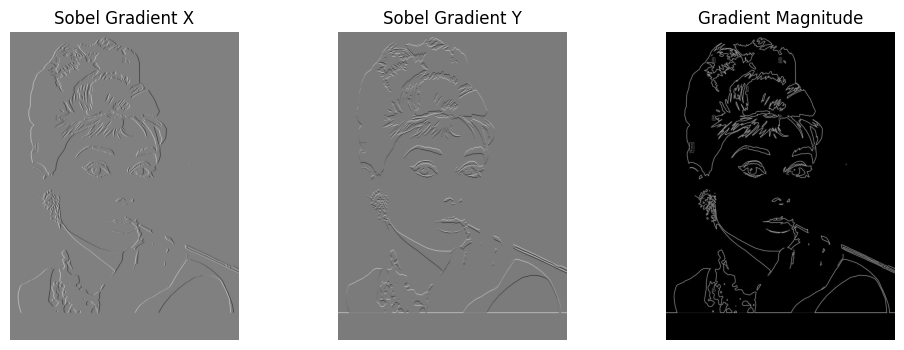

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

# Load grayscale image
img = Image.open("../img/audrey_hepburn.png").convert("L")
img_np = np.array(img, dtype=np.float32)

# Sobel kernels
sobel_x = np.array([[ -1, 0, 1],
                    [ -2, 0, 2],
                    [ -1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[ -1, -2, -1],
                    [  0,  0,  0],
                    [  1,  2,  1]], dtype=np.float32)

# Convolve image with Sobel kernels
grad_x = convolve2d(img_np, sobel_x, mode='same', boundary='symm')
grad_y = convolve2d(img_np, sobel_y, mode='same', boundary='symm')

# Gradient magnitude
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(grad_x, cmap='gray')
plt.title("Sobel Gradient X")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(grad_y, cmap='gray')
plt.title("Sobel Gradient Y")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(grad_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis('off')

plt.show()


---


## 3. Edge Detection Using Laplacian

The laplacian operator is the sum of second derivative in terms of the image intensity.

$$
\nabla^2 I = [\frac{d^2I}{dx^2}, \frac{d^2I}{dy^2}]
$$

Edges are "zero-crossing" in Laplacian of image.

We have the discrete Laplacian using finite differences with grid spacing $\epsilon$:

$$
\frac{\partial^2 I}{\partial x^2} \approx \frac{I_{i+1,j} - 2I_{i,j} + I_{i-1,j}}{\epsilon^2},
$$

$$
\frac{\partial^2 I}{\partial y^2} \approx \frac{I_{i,j+1} - 2I_{i,j} + I_{i,j-1}}{\epsilon^2}.
$$

That corresponds to the convolution mask:
$$
\nabla^2 \approx
\frac{1}{\epsilon^2}
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$

Or the more enhanced version that accounts for diagnol edges:

$$
\nabla^2 \approx
\frac{1}{6\epsilon^2}
\begin{bmatrix}
1 & 4 & 1 \\
4 & -20 & 4 \\
1 & 4 & 1
\end{bmatrix}
$$

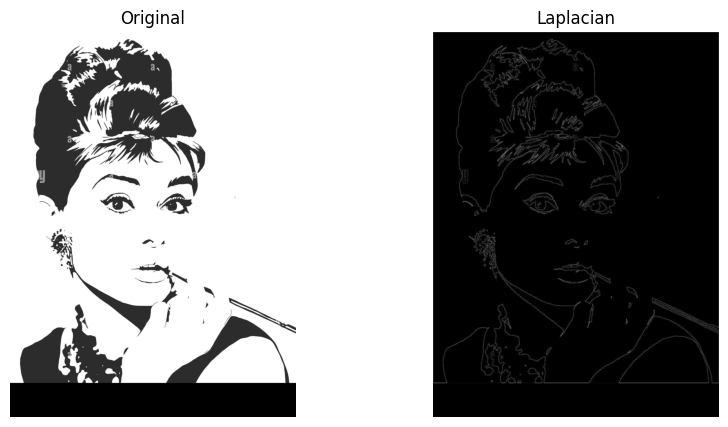

In [3]:
from scipy import ndimage

# Define Laplacian kernel (4-neighbor)
laplacian_kernel = np.array([
    [1,  4, 1],
    [4, -20, 4],
    [1,  4, 1]
])

# Apply Laplacian
laplacian = ndimage.convolve(img_np, laplacian_kernel, mode='constant', cval=0.0)

# Show results
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img_np, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Laplacian")
plt.imshow(np.abs(laplacian), cmap="gray")
plt.axis("off")

plt.show()

---

## 4. Canny Edge Detection

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images.

- Smooth image with 2D Guassian: $n_\sigma * I$
- Compute image gradient using Sobel Operator: $\nabla n_\sigma * I$
- Find Gradient Magnitude at each pixel: $|| \nabla n_\sigma * I ||$
- Find Gradient Orientation at each pixel: $\hat{n} = \frac{\nabla n_\sigma * I}{|| \nabla n_\sigma * I ||}$
- Compute Laplacian along the Gradient Direction $\hat{n}$ at each pixel: $\frac{d^2(n_\sigma * I)}{d\hat{n}^2}$
- Find Zero Crossings in Laplacian to find the edge location

**Note**: the approach above is called the Marr–Hildreth (Laplacian of Gaussian, LoG) edge detection in some places. The actual Canny Edge Detection approach contains additional steps including non-maximum suppression, double threshold and hysterisis.

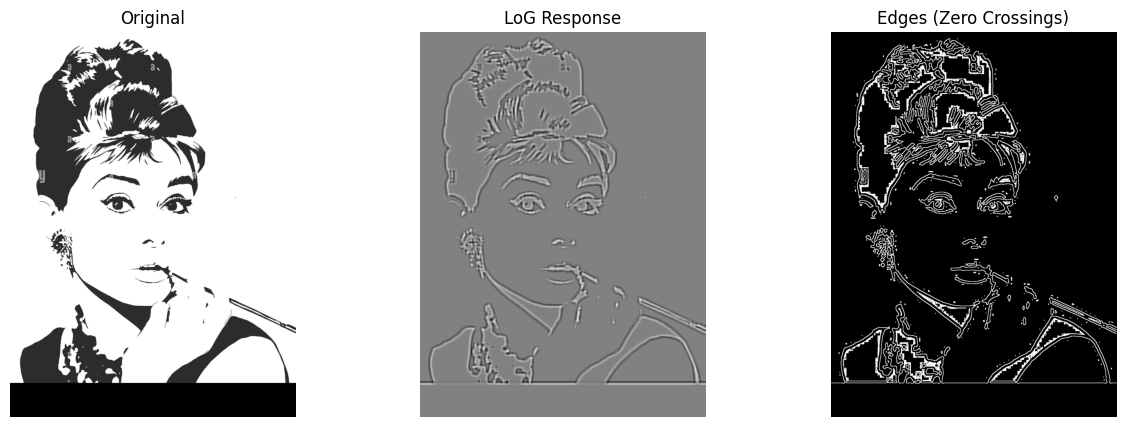

In [4]:
# 1. Define Gaussian kernel
def gaussian_kernel(size=5, sigma=1.0):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

# 2. Define Laplacian of Gaussian (LoG) kernel
def log_kernel(size=5, sigma=1.0):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    norm = (xx**2 + yy**2 - 2*sigma**2) / (sigma**4)
    kernel = norm * np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel -= kernel.mean()  # normalize to zero mean
    return kernel

# 3. Convolve image with LoG kernel
sigma = 10
kernel_size = 15  # bigger kernel → smoother edges
log_k = log_kernel(kernel_size, sigma)
log_img = convolve2d(img, log_k, mode="same", boundary="symm")

# 4. Zero-crossing detection
def zero_crossings(log_img, threshold=0.01):
    Z = np.zeros_like(log_img, dtype=np.uint8)
    rows, cols = log_img.shape
    
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            patch = log_img[i-1:i+2, j-1:j+2]
            p = log_img[i, j]
            if (np.max(patch) > 0 and np.min(patch) < 0):
                if (np.max(patch) - np.min(patch)) > threshold:
                    Z[i, j] = 255
    return Z

edges = zero_crossings(log_img)

# 5. Show results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.axis("off")
plt.subplot(1,3,2), plt.imshow(log_img, cmap='gray'), plt.title("LoG Response")
plt.axis("off")
plt.subplot(1,3,3), plt.imshow(edges, cmap='gray'), plt.title("Edges (Zero Crossings)")
plt.axis("off")
plt.show()
